In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv("./inputs/Car_details.csv")

In [3]:
df

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner
0,Maruti 800 AC,2007,60000,70000,Petrol,Individual,Manual,First Owner
1,Maruti Wagon R LXI Minor,2007,135000,50000,Petrol,Individual,Manual,First Owner
2,Hyundai Verna 1.6 SX,2012,600000,100000,Diesel,Individual,Manual,First Owner
3,Datsun RediGO T Option,2017,250000,46000,Petrol,Individual,Manual,First Owner
4,Honda Amaze VX i-DTEC,2014,450000,141000,Diesel,Individual,Manual,Second Owner
...,...,...,...,...,...,...,...,...
4335,Hyundai i20 Magna 1.4 CRDi (Diesel),2014,409999,80000,Diesel,Individual,Manual,Second Owner
4336,Hyundai i20 Magna 1.4 CRDi,2014,409999,80000,Diesel,Individual,Manual,Second Owner
4337,Maruti 800 AC BSIII,2009,110000,83000,Petrol,Individual,Manual,Second Owner
4338,Hyundai Creta 1.6 CRDi SX Option,2016,865000,90000,Diesel,Individual,Manual,First Owner


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4340 entries, 0 to 4339
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   name           4340 non-null   object
 1   year           4340 non-null   int64 
 2   selling_price  4340 non-null   int64 
 3   km_driven      4340 non-null   int64 
 4   fuel           4340 non-null   object
 5   seller_type    4340 non-null   object
 6   transmission   4340 non-null   object
 7   owner          4340 non-null   object
dtypes: int64(3), object(5)
memory usage: 271.4+ KB


In [5]:
df.isnull().sum()

name             0
year             0
selling_price    0
km_driven        0
fuel             0
seller_type      0
transmission     0
owner            0
dtype: int64

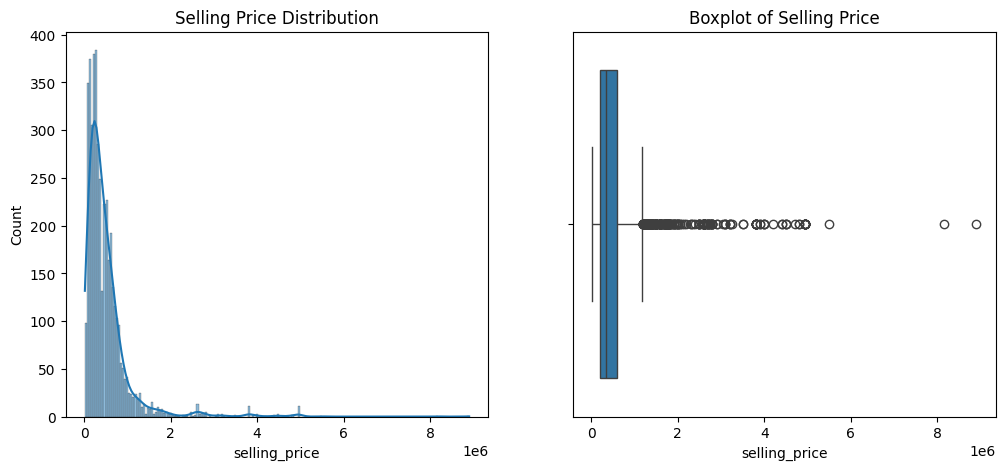

In [6]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['selling_price'].dropna(), kde=True)
plt.title('Selling Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['selling_price'].dropna())
plt.title('Boxplot of Selling Price')
plt.show()

In [7]:
df['log_price'] = np.log10(df['selling_price'])

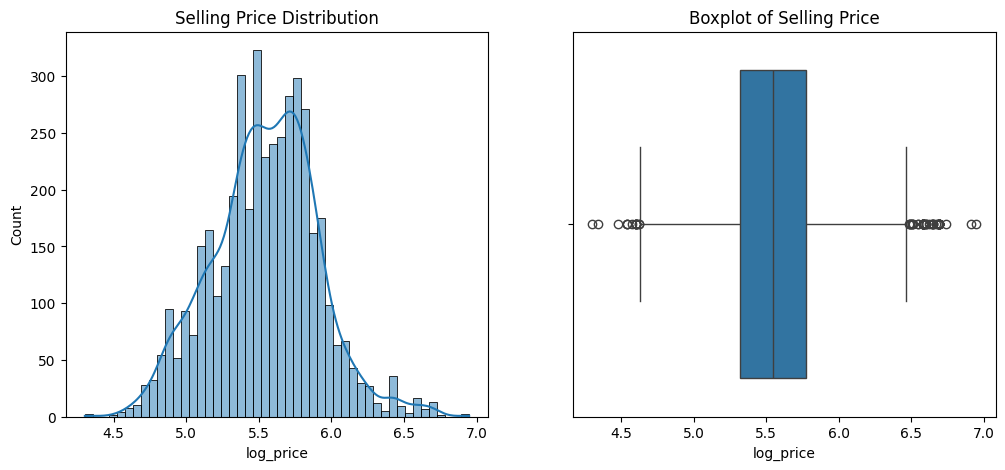

In [8]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'].dropna(), kde=True)
plt.title('Selling Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_price'].dropna())
plt.title('Boxplot of Selling Price')
plt.show()

In [9]:
Q1 = df['log_price'].quantile(0.25)
Q3 = df['log_price'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['log_price'] >= (Q1 - 1.5 * IQR)) & (df['log_price'] <= (Q3 + 1.5 * IQR))]

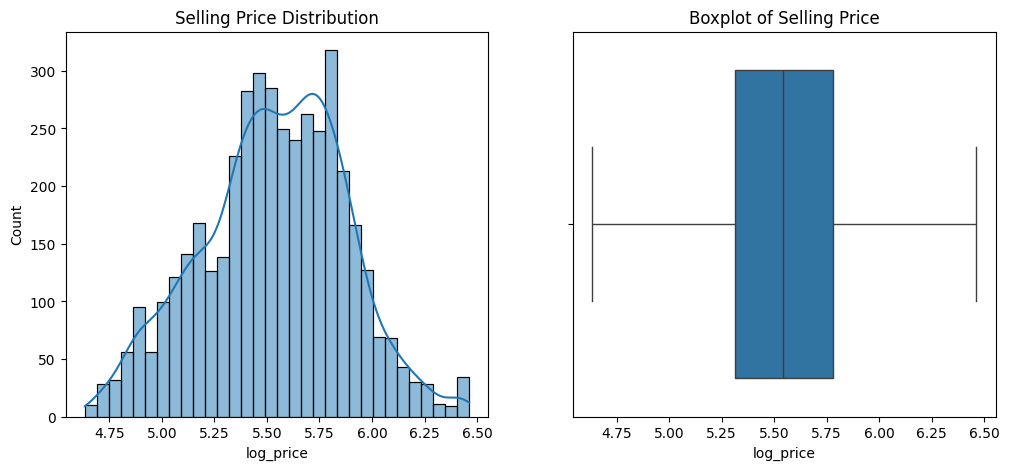

In [10]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['log_price'].dropna(), kde=True)
plt.title('Selling Price Distribution')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['log_price'].dropna())
plt.title('Boxplot of Selling Price')
plt.show()

In [11]:
df_describe = df.describe()

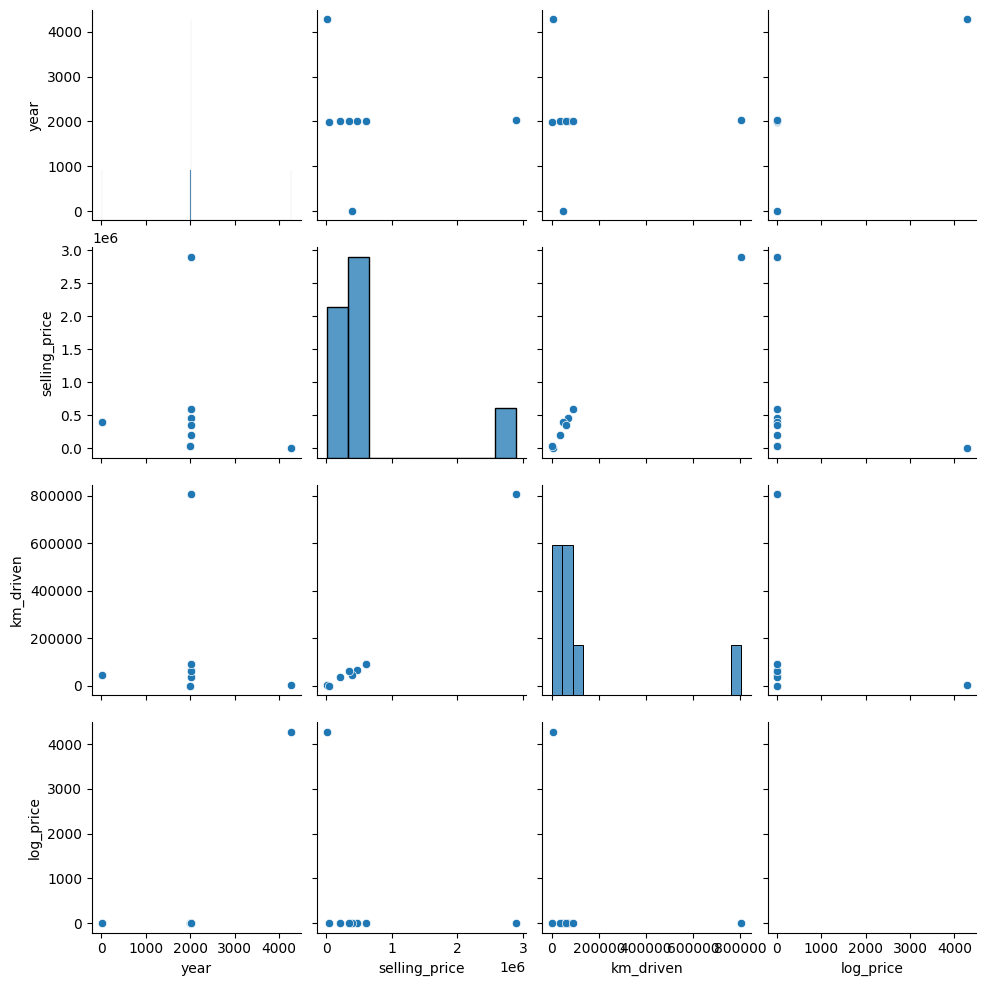

In [12]:
sns.pairplot(df_describe)

In [13]:
df.columns

Index(['name', 'year', 'selling_price', 'km_driven', 'fuel', 'seller_type',
       'transmission', 'owner', 'log_price'],
      dtype='object')

In [14]:
y = df['selling_price']

In [15]:
x = df[['year']]

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x,y, train_size=0.7, random_state=2529)

In [17]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2993, 1), (1283, 1), (2993,), (1283,))

In [18]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [19]:
model.fit(X_train, y_train)

LinearRegression()

In [20]:
model.intercept_

np.float64(-92397990.00457315)

In [21]:
model.coef_

array([46129.58984536])

In [22]:
y_pred = model.predict(X_test)

In [23]:
y_pred

array([322485.58459857, 645392.71351609,  91837.63537177, ...,
       368615.17444393, 645392.71351609, 553133.53382537])

In [24]:
import matplotlib.pyplot as plt

In [25]:
plt.figure(figsize=(10, 6))

<Figure size 1000x600 with 0 Axes>

<Figure size 1000x600 with 0 Axes>

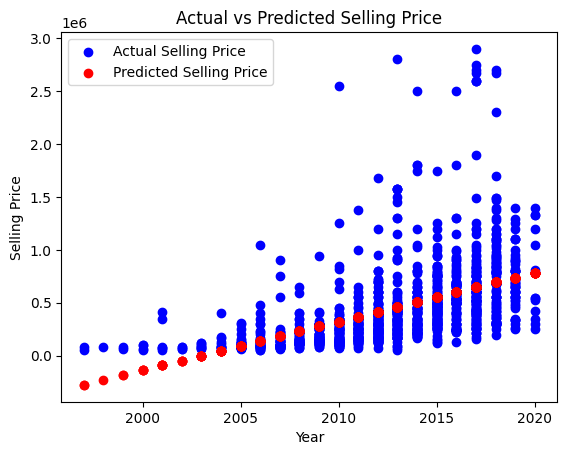

In [26]:
plt.scatter(X_test, y_test, color="blue", label="Actual Selling Price")
plt.scatter(X_test, y_pred, color="red", label="Predicted Selling Price")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend()
plt.title("Actual vs Predicted Selling Price")
plt.show()

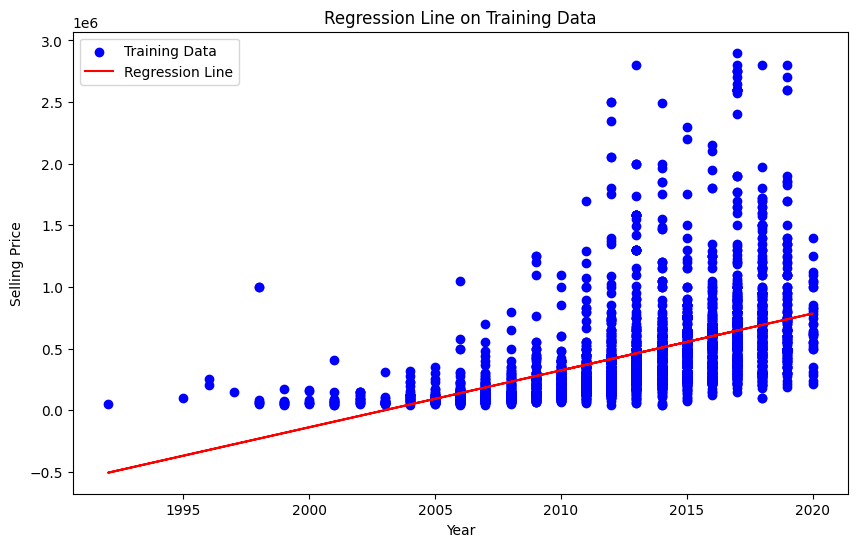

In [27]:
plt.figure(figsize=(10, 6))
plt.scatter(X_train, y_train, color="blue", label="Training Data")
plt.plot(X_train, model.predict(X_train), color="red", label="Regression Line")
plt.xlabel("Year")
plt.ylabel("Selling Price")
plt.legend()
plt.title("Regression Line on Training Data")
plt.show()